In [75]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from scipy.stats.stats import pearsonr
import csv
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors 
from scipy.spatial.distance import correlation 
from sklearn.metrics.pairwise import pairwise_distances
from load_dataset_modules import user_preference

In [104]:
class similarity_metrics:
    def __init__(self, user1, user2):
        self.__user1 = user1
        self.__user2 = user2
    def getUser_preference(self):
        return user_preference
    def getUser1(self):
        return self.__user1
    def getUser2(self):
        return self.__user2
    #squared euclidean distance between two users
    def getSquared_euclidean_similarity(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            item1 = np.array([list1])
            item2 = np.array([list2])
            d = np.linalg.norm(abs(item1-item2))**2
            return (1/d)
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
            
    #squared euclidean distance between two books
    def getSquared_euclidean_similarity2(self):
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1])
            
            item1 = np.array([item1])
            item2 = np.array([item2])
            d = np.linalg.norm(abs(item1-item2))**2
            return  1/(d)
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    #minkowski distance between users
    def getMinkowski_distance_similarity(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            d = distance.minkowski(list1, list2,2)
            return (1/d)
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    #minkowski distance for books
    def getMinkowski_distance_similarity2(self): 
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1])
            d = distance.minkowski(item1, item2, 2 )
            return 1/d
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    
    def getSpearman_Correlation(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            x = pd.Series(list1)
            y = pd.Series(list2)
            r = x.corr(y, method='spearman') 
            return r
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    #spearman distance for books
    def getSpearman_Correlation2(self):
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1])
            x = pd.Series(item1)
            y = pd.Series(item2)
            r = x.corr(y, method='spearman') 
            return r  
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    #chebychev distance for users        
    def getChebyshev_similarity(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            d = distance.chebyshev(list1, list2)
            return (1/d)
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    #chebychev distance for books        
    def getChebyshev_similarity2(self):
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1])       
            d = distance.chebyshev(item1, item2 )
            return 1/d
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    def getHamming_distance(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            d = distance.hamming(list1, list2)
            return d
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    def getHamming_distance2(self):
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1])
            d = distance.hamming(item1, item2)
            return d 
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    
    def getCosine_similarity(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            d = distance.cosine(list1, list2)
            return d
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    #cosine metrics for books
    def getCosine_similarity2(self):
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1])   
            d = distance.cosine(item1, item2)
            return d
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    def getPearson_Correlation(self):
        try:
            list1 = []
            list2 = []
            for  book1 in user_preference[self.__user1]:
                if book1 in user_preference[self.__user2]:
                    print ( "Books in common, author and year of publication ", ":" ,user_preference[self.__user1][book1][0], ":", "user1 rating" ":" ,user_preference[self.__user1][book1][1], )
                    list1.append(user_preference[self.__user1][book1][1])
            for  book2 in user_preference[self.__user2]:
                if book2 in user_preference[self.__user1]:
                    print ( "Books in common, author and year of publication: ", ":" ,user_preference[self.__user2][book2][0], ":", "user2 rating" , ":", user_preference[self.__user2][book2][1], )
                    list2.append(user_preference[self.__user2][book2][1])
            r =  np.corrcoef(list1, list2)[0][1]
            return r
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    def getPearson_Correlation2(self):
        try:
            item1 = []
            item2 = []
            list1 = []
            list2 = []
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user1 in k2:
                        list1.append(k1)
            for k1, v1 in user_preference.items():
                for k2, v2 in v1.items():
                    if self.__user2 in k2:
                        list2.append(k1)
            list1 = set(list1)
            list2 = set(list2)
            similar_users = list1.intersection(list2)
            print('The users who read the two books are :', similar_users)
            for userid in similar_users:
                item1.append(user_preference[userid][self.__user1][1])
                item2.append(user_preference[userid][self.__user2][1]) 
            r =  np.corrcoef(item1, item2)[0][1]
            return r
        except KeyError:
            print ('Enter the correct book ID')
        except ZeroDivisionError:
            print ("try again, denominator cannot be zero")
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
        except:
            print ("some othe exception happened, check if you have entered the correct information")
        else:
            print ("No exception")
    
    def getCombinedDataset(self): 
        # using numpy to load the three datasets

        #loading book dataset
        Book = 'Books.csv'
        books = pd.read_csv(Book, sep = ';' , error_bad_lines =False, quoting=csv.QUOTE_NONE, usecols =[0,1,2,3] , header = None , skiprows= 1, encoding='unicode_escape' ).replace('"', '', regex = True)
        books.columns =['book_id', 'title', 'author', 'year']
     
        #loading book-rating dataset
        rating = 'Book-Ratings.csv'
        ratings =  pd.read_csv(rating, sep = ';' , error_bad_lines =False, quoting=csv.QUOTE_NONE, usecols =[0,1,2]  , header = None , skiprows= 1, encoding='unicode_escape' ).replace('"', '', regex = True)
        ratings.columns =['user_id', 'book_id', 'rating']
 
   
        #loading userdataset 
        users = 'users.csv'
        user = pd.read_csv(users, sep = ';' , error_bad_lines =False, quoting=csv.QUOTE_NONE, usecols =[0,1] , header = None , skiprows= 1, encoding='unicode_escape' ).replace('"', '', regex = True)
        user.columns =['user_id', 'location']
        user
        #creating an adjusted dataframe comprising only common booki  and userid in the three dataset

        adj_ratings = ratings[ratings.book_id.isin(books.book_id)]
        adj_ratings = adj_ratings[adj_ratings.user_id.isin(user.user_id)]
  
        #converting rating column to numerical values

        adj_ratings["rating"] = pd.to_numeric(adj_ratings["rating"], downcast="float")
        adj_ratings
   
        #merging adjusted and book dataset 
        merged_dataset = pd.merge(adj_ratings, books, on = 'book_id')
        merged_dataset 
       
        #merging our data set and removing unwanted columns
        columns= [ 'author', 'year']

        merged_dataset = merged_dataset.drop(columns, axis = 1)
        merged_dataset.head()
        merged_dataset = merged_dataset.dropna(axis = 0, subset = ['title'])
        #i rows were grouped by each of the book id and the book rating and then counted for each of the groups and then rename the column  rating. 
        book_ratingcount = (merged_dataset.groupby(by = ['title', ])['rating']).count().reset_index().rename(columns = {'rating': 'cum_count'})[['title', 'cum_count']]
        book_ratingcount.head(5)
       
        #combining merged_dataset  with the cummulative counts for each of the books
        rating_cum_count  = merged_dataset.merge(book_ratingcount, left_on = 'title' , right_on=  'title', how ='inner')
      
        # conversion of cumummulative Counts to float and and generating its discriptive statistics 
        pd.set_option('display.float_format', lambda x:'%.3f' % x) 
        #print(book_ratingcount['cum_count'].describe())

        popularity_threshold = 200
        rating_popularbooks= rating_cum_count.query('cum_count >= @popularity_threshold')

    
        #combining rating_popularbooks and users dataset
        combined = rating_popularbooks.merge(user, left_on = 'user_id', right_on = 'user_id', how = 'left')
        combined["rating"] = pd.to_numeric(combined ["rating"], downcast="float")
        #filtering users in US and Canada only
        country_rating = combined[combined['location'].str.contains('usa|canada')]
        return country_rating
    
    def getsimilarUsers(self):
        country_rating = similarity_metrics.getCombinedDataset(self)
        combined_datasetPivot =country_rating.pivot_table(index = 'user_id', columns = 'book_id' , values = 'rating').fillna(0)
        country_rating_matrix = csr_matrix(combined_datasetPivot.values)
        combined_datasetPivot.head()
        
        from sklearn.neighbors import NearestNeighbors

        model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
        model_knn.fit(country_rating_matrix)
        
        rand_index = np.random.choice(combined_datasetPivot.shape[0])
        distances, indices = model_knn.kneighbors(combined_datasetPivot.iloc[rand_index, :].values.reshape(1, -1), n_neighbors = 7)

        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('similar users for:  {0}:\n'.format(combined_datasetPivot.index[rand_index]))
            else:
                print('{0}: {1}, with distance of {2}:'.format(i, combined_datasetPivot.index[indices.flatten()[i]], distances.flatten()[i]))
                
    def getsimilarBooks(self):
        country_rating = similarity_metrics.getCombinedDataset(self)
        combined_datasetPivot =country_rating.pivot_table(index = 'book_id', columns = 'user_id' , values = 'rating').fillna(0)
        country_rating_matrix = csr_matrix(combined_datasetPivot.values)
        combined_datasetPivot.head()
        
        from sklearn.neighbors import NearestNeighbors

        model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
        model_knn.fit(country_rating_matrix)
        
        rand_index = np.random.choice(combined_datasetPivot.shape[0])
        distances, indices = model_knn.kneighbors(combined_datasetPivot.iloc[rand_index, :].values.reshape(1, -1), n_neighbors = 7)

        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('similar books for:  {0}:\n'.format(combined_datasetPivot.index[rand_index]))
            else:
                print('{0}: {1}, with distance of {2}:'.format(i, combined_datasetPivot.index[indices.flatten()[i]], distances.flatten()[i]))
    
    def getKnntitle(self):
        country_rating = similarity_metrics.getCombinedDataset(self)
        combined_datasetPivot =country_rating.pivot_table(index = 'title', columns = 'user_id' , values = 'rating').fillna(0)
        country_rating_matrix = csr_matrix(combined_datasetPivot.values)
        combined_datasetPivot.head() 
        
        from sklearn.neighbors import NearestNeighbors

        model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
        model_knn.fit(country_rating_matrix)
        
        rand_index = np.random.choice(combined_datasetPivot.shape[0])
        distances, indices = model_knn.kneighbors(combined_datasetPivot.iloc[rand_index, :].values.reshape(1, -1), n_neighbors = 7)

        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('Recommendations for:  {0}:\n'.format(combined_datasetPivot.index[rand_index]))
            else:
                print('{0}: {1}, with distance of {2}:'.format(i, combined_datasetPivot.index[indices.flatten()[i]], distances.flatten()[i]))
    

In [110]:
#squared euclidean between books and users
def main():
    specify = (input("enter 1 if you are computing euclidean similarity distance for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        euc = similarity_metrics( user1, user2) 
        print ("The squared euclidean similarity  distance between", euc.getUser1(), "and"  , euc.getUser2(), "is" , euc.getSquared_euclidean_similarity())


    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        euc = similarity_metrics( book1, book2) 
        print ("The squared euclidean similarity  distance between", euc.getUser1() , "and"  , euc.getUser2(), "is" , euc.getSquared_euclidean_similarity2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing euclidean similarity distance for  two users and 2 if you are computing for  two books: 1
Enter the first userID please : 278106
Enter the second userID please : 278633
Books in common, author and year of publication  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user1 rating: 9.0
Books in common, author and year of publication  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user1 rating: 0.0
Books in common, author and year of publication:  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user2 rating : 7.0
Books in common, author and year of publication:  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user2 rating : 0.0
The squared euclidean similarity  distance between 278106 and 278633 is 0.25


In [111]:
#minkowski distance between books and users
def main():
    specify = (input("enter 1 if you are computing Minkowski distance for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        min = similarity_metrics( user1, user2) 
        print ("Minkowski distance between", min.getUser1(), "and"  , min.getUser2(), "is" , min.getMinkowski_distance_similarity())


    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        min = similarity_metrics( book1, book2) 
        print ("Minkowski distance between  distance between", min.getUser1() , "and"  , min.getUser2(), "is" , min.getMinkowski_distance_similarity2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing Minkowski distance for  two users and 2 if you are computing for  two books: 2
Enter the first book ID please : 0553280341
Enter the second book ID please : 0440234743
The users who read the two books are : {'232131', '46398', '243930', '234623', '172742', '265115', '217375', '268330', '269566', '115120', '258534', '107244', '210717', '101209', '55492', '102967', '198711', '31556', '258884', '170518', '98723', '52584', '93363', '225810', '17761', '164323', '231237', '141444', '241548', '36606', '105937', '23768', '146113', '124259', '11676', '26544', '241980'}
Minkowski distance between  distance between 0553280341 and 0440234743 is 0.035245368842512066


In [25]:
#spearman distance between users and books
def main():
    specify = (input("enter 1 if you are computing spearman distance for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        spr = similarity_metrics(user1, user2)  
        print ("spearman distance between", spr.getUser1(), "and"  , spr.getUser2(), "is" , spr.getSpearman_Correlation())

    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        spr = similarity_metrics(book1, book2)
        print ("spearman distance between  distance between", spr.getUser1() , "and"  , spr.getUser2(), "is" , spr.getSpearman_Correlation2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing spearman distance for  two users and 2 if you are computing for  two books: 1
Enter the first userID please : 278633
Enter the second userID please : 278106
Books in common, author and year of publication  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user1 rating: 7.0
Books in common, author and year of publication  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user1 rating: 0.0
Books in common, author and year of publication:  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user2 rating : 9.0
Books in common, author and year of publication:  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user2 rating : 0.0
spearman distance between 278633 and 278106 is 0.9999999999999999


In [26]:
#chebychev distance between books and users
def main():
    specify = (input("enter 1 if you are computing chebychev distance for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        chb = similarity_metrics( user1, user2) 
        print ("chebychev distance between", chb.getUser1(), "and"  , chb.getUser2(), "is" , chb.getChebyshev_similarity())


    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        chb = similarity_metrics( book1, book2) 
        print ("chebychev distance between  distance between", chb.getUser1() , "and"  , chb.getUser2(), "is" , chb.getChebyshev_similarity2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing chebychev distance for  two users and 2 if you are computing for  two books: 2
Enter the first book ID please : 0440234743
Enter the second book ID please : 0553280341
The users who read the two books are : {'232131', '46398', '243930', '234623', '172742', '265115', '217375', '268330', '269566', '115120', '258534', '107244', '210717', '101209', '55492', '102967', '198711', '31556', '258884', '170518', '98723', '52584', '93363', '225810', '17761', '164323', '231237', '141444', '241548', '36606', '105937', '23768', '146113', '124259', '11676', '26544', '241980'}
chebychev distance between  distance between 0440234743 and 0553280341 is 0.1


In [28]:
#Hamming distance between books and users
def main():
    specify = (input("enter 1 if you are computing hamming distance for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        ham = similarity_metrics( user1, user2) 
        print ("Hamming distance between", ham.getUser1(), "and"  , ham.getUser2(), "is" , ham.getHamming_distance())


    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        ham = similarity_metrics( book1, book2) 
        print ("Hamming distance between  distance between", ham.getUser1() , "and"  , ham.getUser2(), "is" , ham.getHamming_distance2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing hamming distance for  two users and 2 if you are computing for  two books: 1
Enter the first userID please : 278633
Enter the second userID please : 278106
Books in common, author and year of publication  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user1 rating: 7.0
Books in common, author and year of publication  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user1 rating: 0.0
Books in common, author and year of publication:  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user2 rating : 9.0
Books in common, author and year of publication:  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user2 rating : 0.0
Hamming distance between 278633 and 278106 is 0.5


In [32]:
#Cosine distance between books and users
def main():
    specify = (input("enter 1 if you are computing cosine distance for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        cos = similarity_metrics( user1, user2) 
        print ("Cosine distance between", cos.getUser1(), "and"  , cos.getUser2(), "is" , cos.getCosine_similarity())


    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        cos = similarity_metrics( book1, book2) 
        print ("cos distance between  distance between", cos.getUser1() , "and"  , cos.getUser2(), "is" , cos.getCosine_similarity2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing cosine distance for  two users and 2 if you are computing for  two books: 2
Enter the first book ID please : 0553280341
Enter the second book ID please : 0440234743
The users who read the two books are : {'232131', '46398', '243930', '234623', '172742', '265115', '217375', '268330', '269566', '115120', '258534', '107244', '210717', '101209', '55492', '102967', '198711', '31556', '258884', '170518', '98723', '52584', '93363', '225810', '17761', '164323', '231237', '141444', '241548', '36606', '105937', '23768', '146113', '124259', '11676', '26544', '241980'}
cos distance between  distance between 0553280341 and 0440234743 is 0.5878700245974455


In [33]:
#Pearson correlation between books and users
def main():
    specify = (input("enter 1 if you are computing pearson correlation for  two users and 2 if you are computing for  two books: "))
    if specify == "1":
        user1 = (input("Enter the first userID please : "))
        user2 = (input("Enter the second userID please : "))
        crr = similarity_metrics( user1, user2) 
        print ("pearson correlation between", crr.getUser1(), "and"  , crr.getUser2(), "is" , crr.getPearson_Correlation())

    elif specify == "2":
        book1 = (input("Enter the first book ID please : "))
        book2 = (input("Enter the second book ID please : "))            
        crr = similarity_metrics( book1, book2) 
        print ("Pearson correlation between  distance between", crr.getUser1() , "and"  , crr.getUser2(), "is" , crr.getPearson_Correlation2())

    else:
        print("kindly read the instruction again")
main()


enter 1 if you are computing pearson correlation for  two users and 2 if you are computing for  two books: 1
Enter the first userID please : 278633
Enter the second userID please : 278106
Books in common, author and year of publication  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user1 rating: 7.0
Books in common, author and year of publication  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user1 rating: 0.0
Books in common, author and year of publication:  : {"Songs in Ordinary Time (Oprah's Book Club (Paperback))": ('Mary McGarry Morris', '1996')} : user2 rating : 9.0
Books in common, author and year of publication:  : {'A Lesson Before Dying (Vintage Contemporaries (Paperback))': ('Ernest J. Gaines', '1997')} : user2 rating : 0.0
pearson correlation between 278633 and 278106 is 1.0


In [112]:
# main function to retreive the dataset as either a nested dictionary or as a dataframe
def main():
    specify = (input("How would you like to view the extracted dataset? enter 1 if as a nested dictionary or 2 as a dataframe: "))
    if specify == "1":
        data = similarity_metrics('278106', '278633')  
        return data.getUser_preference()
    
    elif specify == "2":
        data = similarity_metrics('278106', '278633')  
        return data.getCombinedDataset()
        print ("Pearson correlation between  distance between", crr.getUser1() , "and"  , crr.getUser2(), "is" , crr.getPearson_Correlation2())

    else:
        print("kindly read the instruction again")
main()



How would you like to view the extracted dataset? enter 1 if as a nested dictionary or 2 as a dataframe: 2


,user_id,book_id,rating,title,cum_count,location
1,278418,0446520802,0.000,The Notebook,647,"omaha, nebraska, usa"
2,638,0446520802,0.000,The Notebook,647,"san diego, california, usa"
3,3363,0446520802,0.000,The Notebook,647,"knoxville, tennessee, usa"
4,7158,0446520802,10.000,The Notebook,647,"omaha, nebraska, usa"
5,8253,0446520802,10.000,The Notebook,647,"tulsa, oklahoma, usa"
...,...,...,...,...,...,...
93441,263877,0553574574,0.000,Beach Music,224,"victoria, british columbia, canada"
93442,265115,0553574574,0.000,Beach Music,224,"vista, california, usa"
93443,266056,0553574574,0.000,Beach Music,224,"hoover, alabama, usa"
93444,268622,0553574574,0.000,Beach Music,224,"upper township, new jersey, usa"


In [113]:
 # n recommendations for either users, books or book title using k nearest neighbours
def main():
    specify = (input("Who would you like to compute recommendations for? enter 1 if for users, 2 if for books and 3 if for titles: "))
    if specify == "1":
        rec = similarity_metrics('278106', '278633')  
        return rec.getsimilarUsers()
    
    elif specify == "2":
        rec = similarity_metrics('278106', '278633')  
        return rec.getsimilarBooks()
    
    elif specify == "3":
        rec = similarity_metrics('278106', '278633')  
        return rec.getKnntitle()
    
    else:
        print("kindly read the instruction again")
main()

Who would you like to compute recommendations for? enter 1 if for users, 2 if for books and 3 if for titles: 2
similar books for:  0156027321:

1: 0671701592, with distance of 0.8988840579986572:
2: 0679416781, with distance of 0.906505286693573:
3: 037540290X, with distance of 0.9158547520637512:
4: 0385722206, with distance of 0.9212873578071594:
5: 0385720955, with distance of 0.9247643351554871:
6: 0060977493, with distance of 0.9322683215141296:


In [36]:
#loading Book dataset
Book = 'Books.csv'
books = pd.read_csv(Book, sep = ';' , error_bad_lines =False, quoting=csv.QUOTE_NONE, usecols =[0,1,2,3] , header = None , skiprows= 1, encoding='unicode_escape' ).replace('"', '', regex = True)
books.columns =['book_id', 'title', 'author', 'year']

In [37]:
#DATA PREPROCESSING
books.columns

Index(['book_id', 'title', 'author', 'year'], dtype='object')

In [38]:
print(books.shape)
print(list(books.columns))


(29756, 4)
['book_id', 'title', 'author', 'year']


In [39]:
books.head()

,book_id,title,author,year
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [40]:
#checking the data types of books data set
books.dtypes

book_id    object
title      object
author     object
year       object
dtype: object

In [78]:
#loading userdataset 
users = 'users.csv'
user = pd.read_csv(users, sep = ';' , error_bad_lines =False, quoting=csv.QUOTE_NONE, usecols =[0,1] , header = None , skiprows= 1, encoding='unicode_escape' ).replace('"', '', regex = True)
user.columns =['user_id', 'location']
user

,user_id,location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278854,278854,"portland, oregon, usa"
278855,278855,"tacoma, washington, united kingdom"
278856,278856,"brampton, ontario, canada"
278857,278857,"knoxville, tennessee, usa"


In [79]:
#loading book-rating dataset
rating = 'Book-Ratings.csv'
ratings =  pd.read_csv(rating, sep = ';' , error_bad_lines =False, quoting=csv.QUOTE_NONE, usecols =[0,1,2]  , header = None , skiprows= 1, encoding='unicode_escape' ).replace('"', '', regex = True)
ratings.columns =['user_id', 'book_id', 'rating']


<ipython-input-80-88c3f595651c>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Rating Distribution.jpg', bbinches = 'tight', dpi = 100)


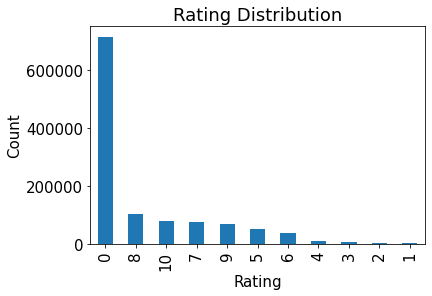

In [80]:
#rating distribution
# visualizing ratings from zero to 10
plt.rc("font", size = 15)
ratings.rating.value_counts(sort = True).plot(kind = 'bar')
plt.title ('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot()
plt.savefig('Rating Distribution.jpg', bbinches = 'tight', dpi = 100)


In [81]:
ratings.head()

,user_id,book_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [82]:
#creating an adjusted dataframe comprising only common bookid  and userid in the three dataset

adj_ratings = ratings[ratings.book_id.isin(books.book_id)]
adj_ratings = adj_ratings[adj_ratings.user_id.isin(user.user_id)]
print(ratings.shape)
print (adj_ratings.shape)

(1149780, 3)
(467286, 3)


In [83]:
#converting rating column to numerical values

adj_ratings["rating"] = pd.to_numeric(adj_ratings["rating"], downcast="float")
adj_ratings

,user_id,book_id,rating
0,276725,034545104X,0.000
2,276727,0446520802,0.000
8,276744,038550120X,7.000
10,276746,0425115801,0.000
11,276746,0449006522,0.000
...,...,...,...
1149767,276704,0446353957,0.000
1149768,276704,0446605409,0.000
1149771,276704,0743211383,7.000
1149772,276704,080410526X,0.000


In [84]:
#checking if there are missing values in the adjusted rating dataset/frame
adj_ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [85]:
#seperating zero ratings from non_zero ratings, 'n_rating' ratings represent the non_zero ratings given by the users while
# 'z_ratings represent the ratings with zero values'

n_ratings = adj_ratings[adj_ratings.rating != 0]
z_ratings = adj_ratings[adj_ratings.rating == 0]
n_ratings.rating


8          7.000
16         9.000
19         9.000
20         8.000
28         8.000
           ...  
1149744   10.000
1149761    6.000
1149762    5.000
1149771    7.000
1149777   10.000
Name: rating, Length: 181336, dtype: float32

In [86]:
#identifying users who gave zero ratings and who have not given zero ratings

user_nratings = adj_ratings[adj_ratings.user_id.isin(n_ratings.user_id)]
user_zratings = adj_ratings[adj_ratings.user_id.isin(z_ratings.user_id)]
# checking users who have given non-zero ratings
user_nratings

,user_id,book_id,rating
8,276744,038550120X,7.000
16,276747,0060517794,9.000
17,276747,0451192001,0.000
18,276747,0609801279,0.000
19,276747,0671537458,9.000
...,...,...,...
1149767,276704,0446353957,0.000
1149768,276704,0446605409,0.000
1149771,276704,0743211383,7.000
1149772,276704,080410526X,0.000


<AxesSubplot:xlabel='rating', ylabel='count'>

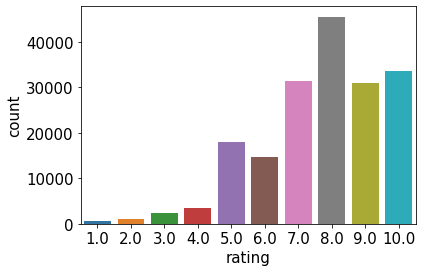

In [87]:
#visualizing the non_zero ratings only
sns.countplot(data = n_ratings, x = "rating")

In [51]:
#merging adjusted and book dataset 
merged_dataset = pd.merge(adj_ratings, books, on = 'book_id')
merged_dataset 

,user_id,book_id,rating,title,author,year
0,276725,034545104X,0.000,Flesh Tones: A Novel,M. J. Rose,2002
1,2313,034545104X,5.000,Flesh Tones: A Novel,M. J. Rose,2002
2,6543,034545104X,0.000,Flesh Tones: A Novel,M. J. Rose,2002
3,8680,034545104X,5.000,Flesh Tones: A Novel,M. J. Rose,2002
4,10314,034545104X,9.000,Flesh Tones: A Novel,M. J. Rose,2002
...,...,...,...,...,...,...
467281,274308,037312273X,0.000,To Marry McAllister (Bachelor Cousins) (Harle...,Carole Mortimer,2002
467282,178032,006008829X,8.000,Choices: Taking Control of Your Life and Makin...,Melody Beattie,2002
467283,270838,006008829X,10.000,Choices: Taking Control of Your Life and Makin...,Melody Beattie,2002
467284,227257,1576736261,0.000,African Skies (Palisades Pure Romance),Karen Rispin,2000


In [52]:
#merging our data set and removing unwanted columns
columns= [ 'author', 'year']

merged_dataset = merged_dataset.drop(columns, axis = 1)
merged_dataset.head()


,user_id,book_id,rating,title
0,276725,034545104X,0.000,Flesh Tones: A Novel
1,2313,034545104X,5.000,Flesh Tones: A Novel
2,6543,034545104X,0.000,Flesh Tones: A Novel
3,8680,034545104X,5.000,Flesh Tones: A Novel
4,10314,034545104X,9.000,Flesh Tones: A Novel


In [53]:
merged_dataset = merged_dataset.dropna(axis = 0, subset = ['title'])
merged_dataset.head(5)

,user_id,book_id,rating,title
0,276725,034545104X,0.000,Flesh Tones: A Novel
1,2313,034545104X,5.000,Flesh Tones: A Novel
2,6543,034545104X,0.000,Flesh Tones: A Novel
3,8680,034545104X,5.000,Flesh Tones: A Novel
4,10314,034545104X,9.000,Flesh Tones: A Novel


In [54]:
#grouping by title considering the rating column
book_ratingcount = (merged_dataset.groupby(by = ['title', ])['rating']).count().reset_index().rename(columns = {'rating': 'cum_count'})[['title', 'cum_count']]
book_ratingcount.head(5)

,title,cum_count
0,Beyond IBM: Leadership Marketing and Finance ...,1
1,It Takes Two,2
2,"Q-Space (Star Trek The Next Generation, Book 47)",17
3,Tales of Terror and Suspense,1
4,"' Sie belieben wohl zu scherzen, Mr. Feynman.'...",1


In [76]:
#combining merged_dataset  with the cummulative counts for each of the books
rating_cum_count  = merged_dataset.merge(book_ratingcount, left_on = 'title' , right_on=  'title', how ='inner')
rating_cum_count

,user_id,book_id,rating,title,cum_count
0,276725,034545104X,0.000,Flesh Tones: A Novel,60
1,2313,034545104X,5.000,Flesh Tones: A Novel,60
2,6543,034545104X,0.000,Flesh Tones: A Novel,60
3,8680,034545104X,5.000,Flesh Tones: A Novel,60
4,10314,034545104X,9.000,Flesh Tones: A Novel,60
...,...,...,...,...,...
467281,274308,037312273X,0.000,To Marry McAllister (Bachelor Cousins) (Harle...,3
467282,178032,006008829X,8.000,Choices: Taking Control of Your Life and Makin...,2
467283,270838,006008829X,10.000,Choices: Taking Control of Your Life and Makin...,2
467284,227257,1576736261,0.000,African Skies (Palisades Pure Romance),1


In [56]:
# conversion of cumummulative Counts to float and and generating its discriptive statistics 
pd.set_option('display.float_format', lambda x:'%.3f' % x) 
print(book_ratingcount['cum_count'].describe())
             

count   27694.000
mean       16.873
std        44.634
min         1.000
25%         2.000
50%         5.000
75%        14.000
max      2502.000
Name: cum_count, dtype: float64


In [57]:
print(book_ratingcount['cum_count'].quantile(np.arange(.9, 1, .01)))

0.900    38.000
0.910    42.000
0.920    47.000
0.930    53.000
0.940    59.000
0.950    68.000
0.960    79.000
0.970    98.000
0.980   130.000
0.990   200.000
Name: cum_count, dtype: float64


In [58]:
popularity_threshold = 50
rating_popularbooks= rating_cum_count.query('cum_count >= @popularity_threshold')


In [59]:
rating_popularbooks.head()


,user_id,book_id,rating,title,cum_count
0,276725,034545104X,0.000,Flesh Tones: A Novel,60
1,2313,034545104X,5.000,Flesh Tones: A Novel,60
2,6543,034545104X,0.000,Flesh Tones: A Novel,60
3,8680,034545104X,5.000,Flesh Tones: A Novel,60
4,10314,034545104X,9.000,Flesh Tones: A Novel,60


In [60]:
rating_popularbooks['book_id'].nunique()

3162

In [88]:
#combining rating_popularbooks and users dataset

combined = rating_popularbooks.merge(user, left_on = 'user_id', right_on = 'user_id', how = 'left')
combined["rating"] = pd.to_numeric(combined ["rating"], downcast="float")
combined.head()

,user_id,book_id,rating,title,cum_count,location
0,276725,034545104X,0.000,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5.000,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0.000,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5.000,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9.000,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [62]:
#filtering users in US and Canada only
country_rating = combined[combined['location'].str.contains('usa|canada')]
country_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221334 entries, 0 to 253203
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    221334 non-null  object 
 1   book_id    221334 non-null  object 
 2   rating     221334 non-null  float32
 3   title      221334 non-null  object 
 4   cum_count  221334 non-null  int64  
 5   location   221334 non-null  object 
 6   Age        158288 non-null  object 
dtypes: float32(1), int64(1), object(5)
memory usage: 12.7+ MB


In [89]:
country_rating


,user_id,book_id,rating,title,cum_count,location,Age
0,276725,034545104X,0.000,Flesh Tones: A Novel,60,"tyler, texas, usa",NaN
1,2313,034545104X,5.000,Flesh Tones: A Novel,60,"cincinnati, ohio, usa",23
2,6543,034545104X,0.000,Flesh Tones: A Novel,60,"strafford, missouri, usa",34
3,8680,034545104X,5.000,Flesh Tones: A Novel,60,"st. charles county, missouri, usa",2
4,10314,034545104X,9.000,Flesh Tones: A Novel,60,"beaverton, oregon, usa",NaN
...,...,...,...,...,...,...,...
253198,251483,0553573209,0.000,Firefly Beach,77,"gilroy, california, usa",54
253199,253311,0553573209,0.000,Firefly Beach,77,"blaine, minnesota, usa",43
253200,260127,0553573209,3.000,Firefly Beach,77,"mandeville, louisiana, usa",NaN
253201,263320,0553573209,5.000,Firefly Beach,77,"fredericksburg, texas, usa",NaN


In [64]:
combined_datasetPivot =country_rating.pivot_table(index = 'title', columns = 'user_id' , values = 'rating').fillna(0)
country_rating_matrix = csr_matrix(combined_datasetPivot.values)
combined_datasetPivot.head()


user_id,100002,100004,100009,10001,100010,100030,100035,100037,100038,100043,...,9992,99946,99954,99955,99963,99970,99973,99980,99996,99997
title,,,,,,,,,,,,,,,,,,,,,
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010: Odyssey Two,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2061: Odyssey Three,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
24 Hours,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [65]:
# finding n users with the highest similarity scores to a target user
combined_datasetPivot =country_rating.pivot_table(index = 'user_id', columns = 'book_id' , values = 'rating').fillna(0)
#converting combined_datasetPivot to array matrix
country_rating_matrix = csr_matrix(combined_datasetPivot.values)
combined_datasetPivot.head()

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn= model_knn.fit(country_rating_matrix)

rand_index = np.random.choice(combined_datasetPivot.shape[0])
distances, indices = model_knn.kneighbors(combined_datasetPivot.iloc[rand_index, :].values.reshape(1, -1), n_neighbors = 7)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Target user:  {0}:\n'.format(combined_datasetPivot.index[rand_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, combined_datasetPivot.index[indices.flatten()[i]], distances.flatten()[i]))
       

Target user:  86481:

1: 193441, with distance of 0.2567058205604553:
2: 38707, with distance of 0.2567058205604553:
3: 158072, with distance of 0.2567058205604553:
4: 61438, with distance of 0.2567058205604553:
5: 82253, with distance of 0.2567058205604553:
6: 221696, with distance of 0.3310352563858032:


In [67]:
# finding n most similar books to the target book.
combined_datasetPivot =country_rating.pivot_table(index = 'book_id', columns = 'user_id' , values = 'rating').fillna(0)
country_rating_matrix = csr_matrix(combined_datasetPivot.values)
combined_datasetPivot.head()

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn= model_knn.fit(country_rating_matrix)

rand_index = np.random.choice(combined_datasetPivot.shape[0])
distances, indices = model_knn.kneighbors(combined_datasetPivot.iloc[rand_index, :].values.reshape(1, -1), n_neighbors = 7)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Target Book:  {0}:\n'.format(combined_datasetPivot.index[rand_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, combined_datasetPivot.index[indices.flatten()[i]], distances.flatten()[i]))
       

Target Book:  0553227750:

1: 0553227467, with distance of 0.7713767290115356:
2: 0385471432, with distance of 0.7918936014175415:
3: 0743253973, with distance of 0.798616886138916:
4: 0553050680, with distance of 0.8262674808502197:
5: 0553289411, with distance of 0.8389910459518433:
6: 0385333404, with distance of 0.8414046168327332:


In [68]:
#Recommendation by book title
combined_datasetPivot =country_rating.pivot_table(index = 'title', columns = 'user_id' , values = 'rating').fillna(0)
country_rating_matrix = csr_matrix(combined_datasetPivot.values)
combined_datasetPivot.head()

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn= model_knn.fit(country_rating_matrix)

rand_index = np.random.choice(combined_datasetPivot.shape[0])
distances, indices = model_knn.kneighbors(combined_datasetPivot.iloc[rand_index, :].values.reshape(1, -1), n_neighbors = 7)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for:  {0}:\n'.format(combined_datasetPivot.index[rand_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, combined_datasetPivot.index[indices.flatten()[i]], distances.flatten()[i]))
      

Recommendations for:  Matilda:

1: The Martian Chronicles, with distance of 0.8673133254051208:
2: I, Robot, with distance of 0.907724142074585:
3: OLD MAN AND THE SEA, with distance of 0.9099215269088745:
4: Harry Potter and the Chamber of Secrets (Book 2), with distance of 0.9165456891059875:
5: Love in the Time of Cholera (Penguin Great Books of the 20th Century), with distance of 0.9215222001075745:
6: The Stand: Complete and Uncut, with distance of 0.922086775302887:


In [69]:

data = combined_datasetPivot.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
data

(2068, 37667) (2068,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)

...
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [72]:
# We need to scale the features
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [73]:
from  sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train, y_train)#trains the model
predict_knn = knn_model.predict(X_test)

In [74]:
from sklearn. model_selection import cross_val_score
scores = cross_val_score(knn_model, X_train, y_train, cv=10)
print("Accuracy:",round(scores.mean()*100,2),"%")


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 99.86 %
